<a href="https://colab.research.google.com/github/jacosta387/cd_202202_jose_acosta/blob/main/Taller4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [42]:
#Datos de hoteles
ruta = 'https://raw.githubusercontent.com/rpizarrog/FundamentosMachineLearning/master/datos/melb_data.csv'
df = pd.read_csv(ruta)

In [43]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [44]:
df = df.select_dtypes(exclude=['object'])

In [45]:
#Buscar nulos
df.isnull().sum()

Rooms               0
Price               0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Lattitude           0
Longtitude          0
Propertycount       0
dtype: int64

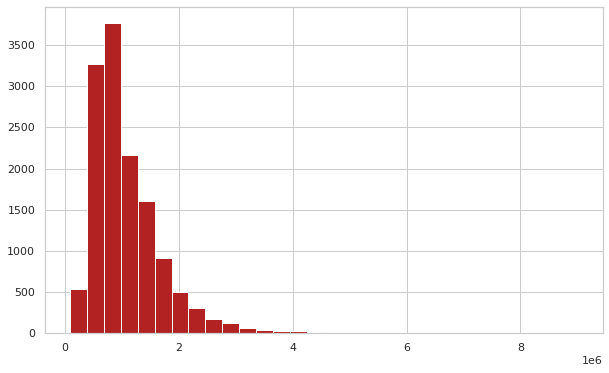

In [46]:
#Histograma
df.Price.hist(color='firebrick', bins=30, figsize=(10, 6))

In [47]:
#Borrado de datos nulos
df = df.dropna()
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [48]:
#Datos con área menor o igual a 800
df0 = df[df["BuildingArea"]<=800]

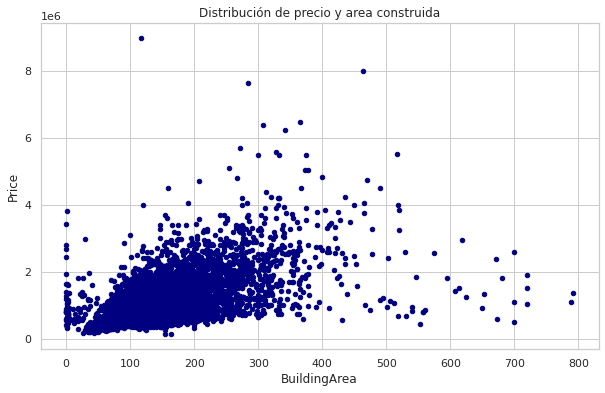

In [49]:
#Diagrama de distribución
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'BuildingArea', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y area construida');

In [50]:
#Datos con área cero
dfzero = df0[df0["BuildingArea"]<=15]
len(dfzero)

56

In [51]:
#Se eliminan los registros de menos de 15 mts cuadrados de area
df0 = df0[df0["BuildingArea"]>15]

In [52]:
#Se eliminan todos los datos que estén más allá de 3 desviaciones estándar
#df0 = df0[(np.abs(zscore(df0['BuildingArea']))<=3)]
df0 = df0[(np.abs(zscore(df0['Price']))<=3)]
df0

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


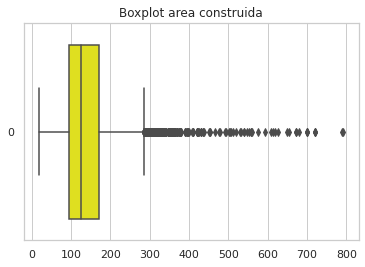

In [53]:
#Boxplot
ax = sb.boxplot(data=df0['BuildingArea'].values, orient='h', color='yellow')
ax.set_title('Boxplot area construida');
plt.show()

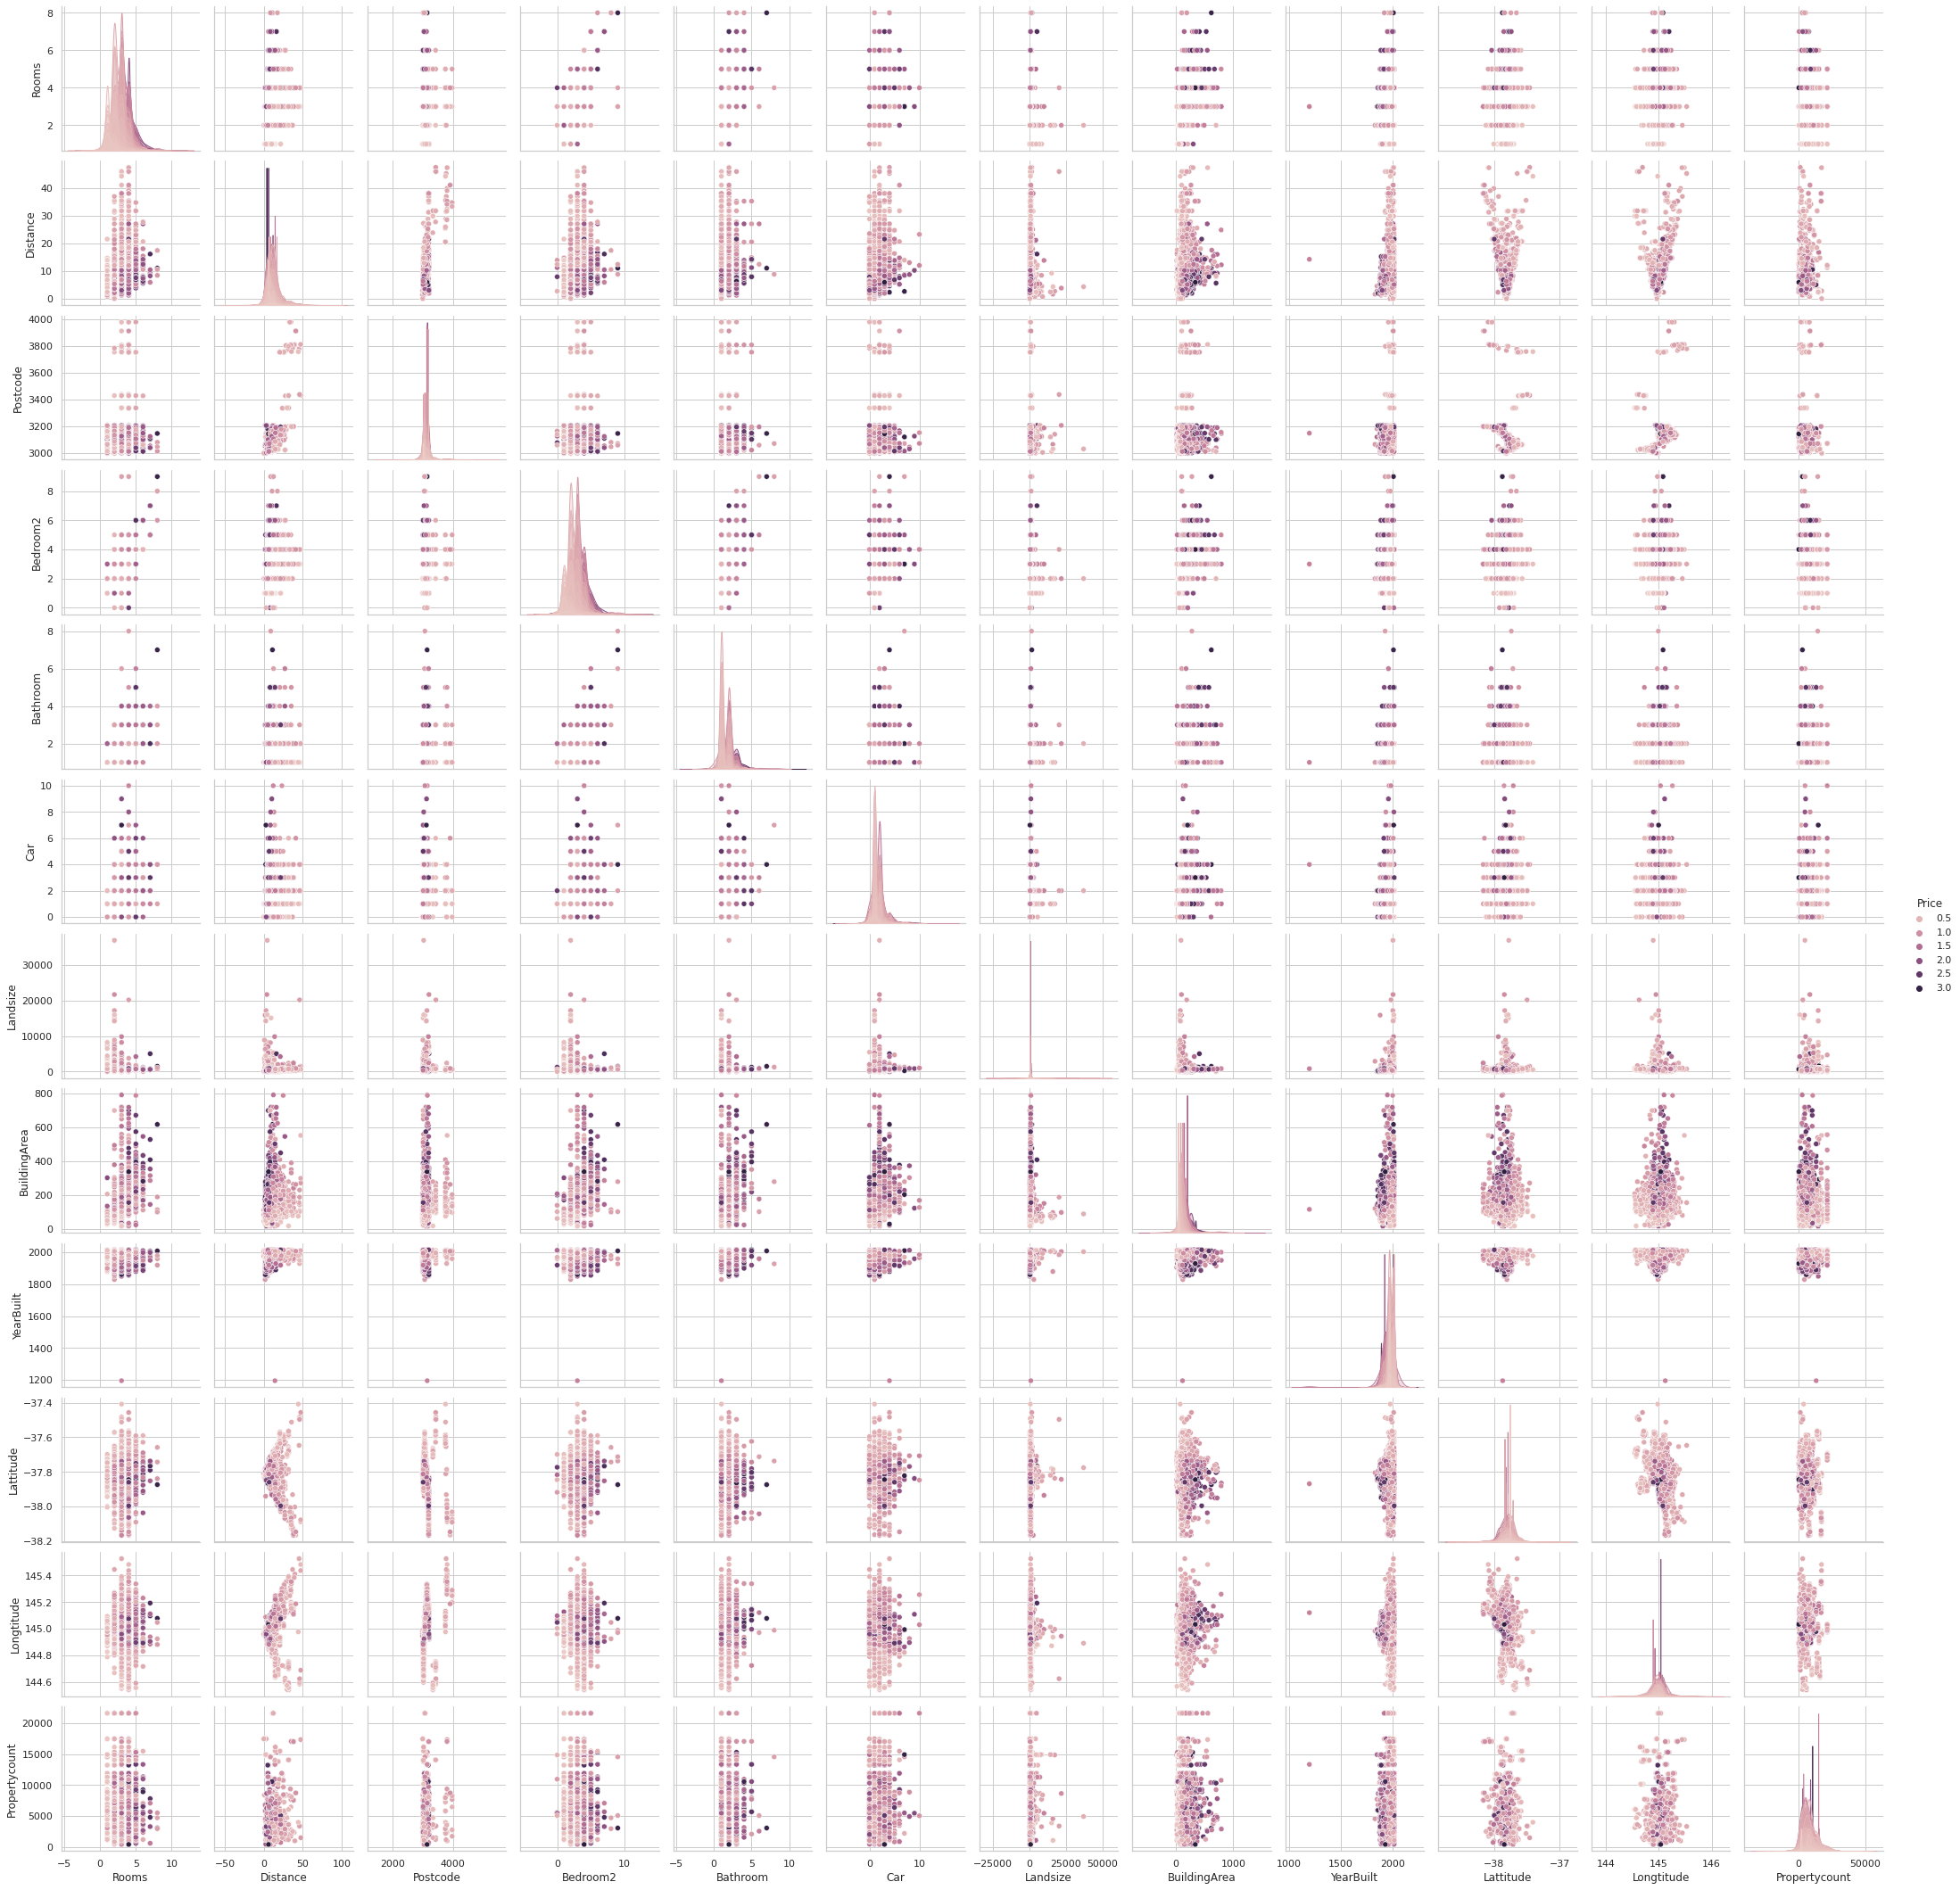

In [55]:
#Múltiples diagramas por parejas
sb.set_theme(style="whitegrid")
sb.pairplot(df0, hue='Price')

## Análisis de datos preliminar usando el coeficiente de correlación lineal de Pearson::

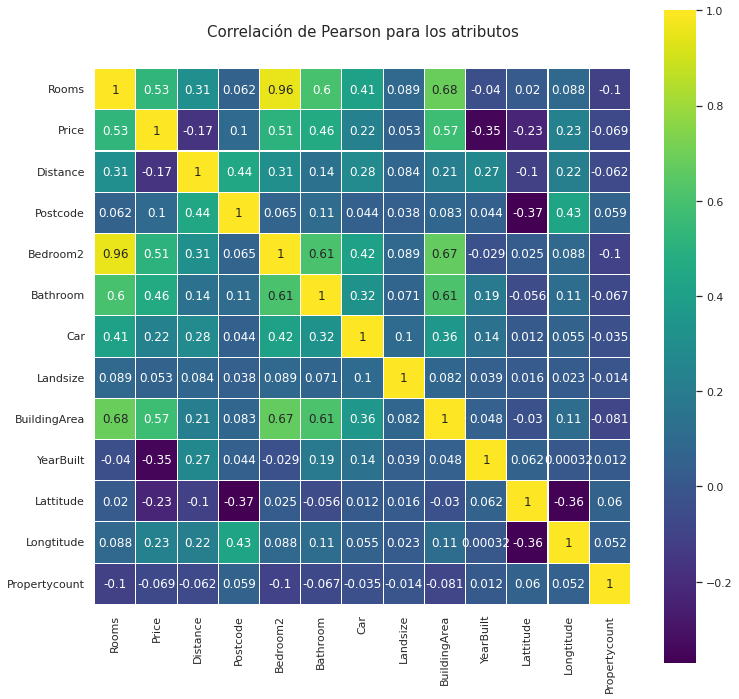

In [61]:
import seaborn as sns #Generar gráficos estadisticos, integra con libreria pandas.
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlación de Pearson para los atributos', y=1.05, size=15)
sns.heatmap(df0.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# **1 Relación.**
Price vs Rooms

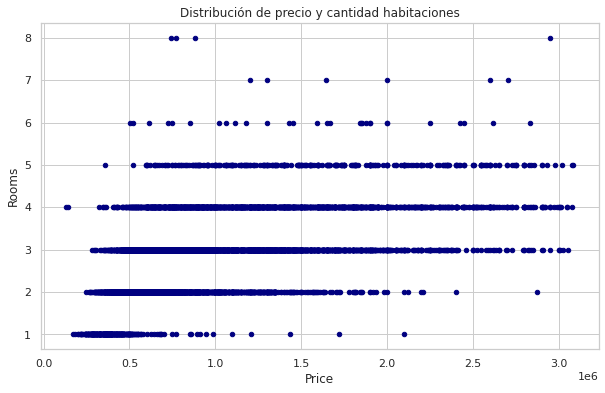

In [56]:
#Diagrama de distribución de precio y cantidad habitaciones
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'Price', y = 'Rooms', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y cantidad habitaciones');

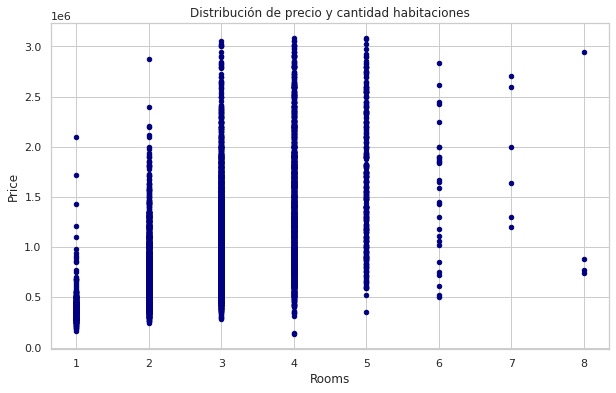

In [57]:
#Diagrama de distribución de precio y cantidad habitaciones
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'Rooms', y = 'Price', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y cantidad habitaciones');

**Conclusión. **
Según el gráfico de distribución se observa:

1-> Las casas con una y dos habitaciones son acorde a su precio, exceptuando algunos casos donde por el sector pueda que sea más costoso, tambien seria necesario validar en el contexto de cada caso si se trata de un local comercial o bodega, para justificar su alto costo.

2-> Las casas con tres, cuatro y hasta cinco habitaciones son lo más común en el contexto inmobiliario y se pueden conseguir desde precios bajos, medios y altos.

3-> Las casas con más de cinco habitaciones no son tan populares.

# **2 Relación.**
Price and Year Built

In [58]:
#Datos con año construcción cero
dfzero = df0[df0["YearBuilt"]<=1800]
len(dfzero)

1

In [59]:
#Se eliminan los registros de menos del año de construcción 1800
df0 = df0[df0["YearBuilt"]>1800]

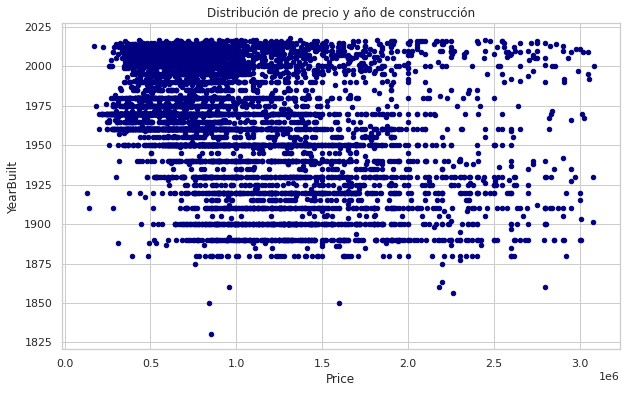

In [60]:
#Diagrama de distribución de precio y cantidad habitaciones
fig, ax = plt.subplots(figsize=(10, 6))
df0.plot(x = 'Price', y = 'YearBuilt', c = 'navy', kind = "scatter", ax = ax)
ax.set_title('Distribución de precio y año de construcción');

**Conclusión. **
Según el gráfico de distribución se observa:

1-> Entre el año 1825 a 1875 son pocas la casas fabricadas.

2-> A partir del año 1875 hasta 1950 fue inicio una etapa de construcción de propiedades de diferentes precios, aunque mayor cantidad entre $500.000 a $1.500.000 dolares AUS.

3-> A partir del año 1950 hasta la fecha del dataset se disparo la demanda de propiedades a menor costo entre $500.000 a $1.500.000 dolares AUS. Y con menor frecuencia a partir de $1.500.000 dolares AUS.

